In [1]:
import numpy as np 
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/predict-movie-success-rate/movie_success_rate.csv


In [2]:
df = pd.read_csv('/kaggle/input/predict-movie-success-rate/movie_success_rate.csv')

In [3]:
df.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Success
0,1.0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014.0,121.0,8.1,757074.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,2.0,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012.0,124.0,7.0,485820.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,3.0,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016.0,117.0,7.3,157606.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4.0,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016.0,108.0,7.2,60545.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016.0,123.0,6.2,393727.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore', 'Action', 'Adventure', 'Aniimation', 'Biography', 'Comedy',
       'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War',
       'Western', 'Success'],
      dtype='object')

In [5]:
df['Genre'].value_counts()

Action,Adventure,Sci-Fi     50
Comedy,Drama,Romance        30
Drama                       29
Drama,Romance               27
Comedy                      26
                            ..
Action,Crime,Sci-Fi          1
Drama,Western                1
Mystery,Romance,Thriller     1
Action,Horror,Romance        1
Action,Fantasy,War           1
Name: Genre, Length: 189, dtype: int64

In [6]:
df['Director'].value_counts()

Ridley Scott          8
Paul W.S. Anderson    6
David Yates           6
Michael Bay           6
Woody Allen           5
                     ..
Andrés Muschietti     1
Bennett Miller        1
Christopher Landon    1
Kevin Lima            1
Ericson Core          1
Name: Director, Length: 524, dtype: int64

In [7]:
df['Actors'].value_counts()

Jennifer Lawrence, Josh Hutcherson, Liam Hemsworth, Woody Harrelson    2
Gerard Butler, Aaron Eckhart, Morgan Freeman,Angela Bassett            2
Shia LaBeouf, Megan Fox, Josh Duhamel, Tyrese Gibson                   2
Daniel Radcliffe, Emma Watson, Rupert Grint, Michael Gambon            2
Justin Chatwin, James Marsters, Yun-Fat Chow, Emmy Rossum              1
                                                                      ..
David Oyelowo, Rosamund Pike, Tom Felton, Jack Davenport               1
Cate Blanchett, Alec Baldwin, Peter Sarsgaard, Sally Hawkins           1
Zac Efron, Wes Bentley, Emily Ratajkowski, Jonny Weston                1
James Franco, Amber Tamblyn, Kate Mara, Sean Bott                      1
Reese Witherspoon, Laura Dern, Gaby Hoffmann,Michiel Huisman           1
Name: Actors, Length: 834, dtype: int64

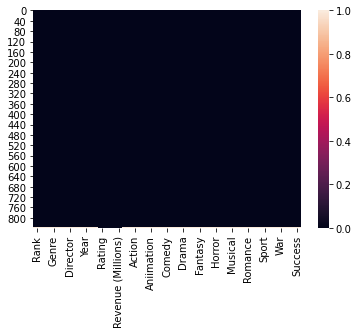

In [8]:
import seaborn as sns
sns.heatmap(df.isnull())

In [9]:
df = df.fillna(df.median())

In [10]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore', 'Action', 'Adventure', 'Aniimation', 'Biography', 'Comedy',
       'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War',
       'Western', 'Success'],
      dtype='object')

In [11]:
x = df[['Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore', 'Action', 'Adventure', 'Aniimation', 'Biography', 'Comedy',
       'Crime', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music',
       'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War',
       'Western']]
y = df['Success']


In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.1,stratify=y)

In [13]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression()

In [14]:
log.score(x_test,y_test)

0.9166666666666666

In [15]:
from sklearn.metrics import confusion_matrix
clf = confusion_matrix(y_test,log.predict(x_test))

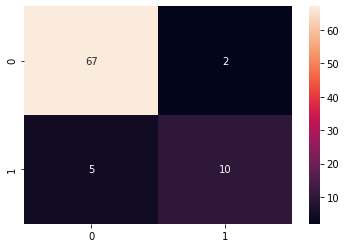

In [16]:
sns.heatmap(clf,annot=True)

In [17]:
x_train_opt = x_train.copy()
x_test_opt = x_test.copy()

In [18]:
from sklearn.preprocessing import StandardScaler
x_train_opt = StandardScaler().fit_transform(x_train_opt)
x_test_opt = StandardScaler().fit_transform(x_test_opt)

In [19]:
log.fit(x_train_opt,y_train)

LogisticRegression()

In [20]:
log.score(x_test_opt,y_test)

0.9047619047619048

In [21]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=40)
kn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=40)

In [22]:
kn.score(x_test,y_test)

0.9166666666666666

In [23]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(x_train,y_train)
tree.score(x_test,y_test)

1.0

In [24]:
tree.score(x_train,y_train)

1.0

In [25]:
from sklearn.metrics import confusion_matrix
clf = confusion_matrix(y_test,tree.predict(x_test))

In [26]:
clf

array([[69,  0],
       [ 0, 15]])

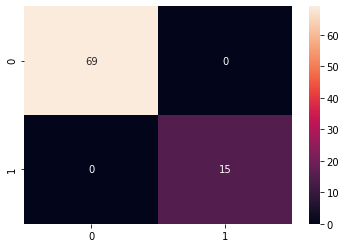

In [27]:
sns.heatmap(clf,annot=True)